In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive"

'Aditya_TAMU_MSCS (1).pdf'
 Aditya_TAMU_MSCS.pdf
 Aditya_TAMU_Resume.pdf
 AdityaTempTimeSheet.gsheet
 AI_Final_report.pdf
'AI Project'
 best_model.pth.tar
 Books
 cats_and_dogs_small
'Colab Notebooks'
 deep-person-reid.zip
'Dennis L. Kasper_ Anthony S. Fauci_ Stephen L. Hauser_ Dan L. Longo_ J. Larry Jameson_ Joseph Loscalzo - Harrison’s Principles of Internal Medicine, Twentieth Edition (Vol.1 & Vol.2) (2018, McGraw-Hill Education _ .pdf'
'Download Folder Sept 2018'
 epilight_cpp_new.pdf
'feature_test_gallery (1).mat'
'feature_test_gallery (2).mat'
 feature_test_gallery.mat
'feature_test_query (1).mat'
'feature_test_query (2).mat'
 feature_test_query.mat
 G_10.pkl
 IMG_20180817_122408.jpg
 IMG_20180817_122409.jpg
 interview-preparation-best-100-ashay-raut.pdf
 MLOnAWS.pem
 MLOnAWS.ppk
'P&ID Basic'
 Practice.gdoc
 Rent
 SSN.pdf
'TAMU Study'
'Tuition TAMU'
 Untitled0.ipynb
'US VISA Docs'
'Weekly time sheet.gsheet'


In [0]:
!pwd

/content


In [0]:
# Import the files for training/testing

import os, shutil

base_dir = '/content/drive/My Drive/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [0]:
# Confirming the sets

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
# Setting up the data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

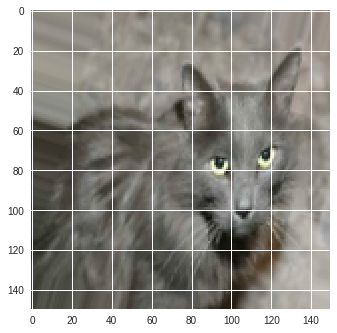

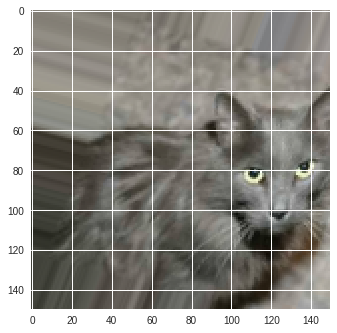

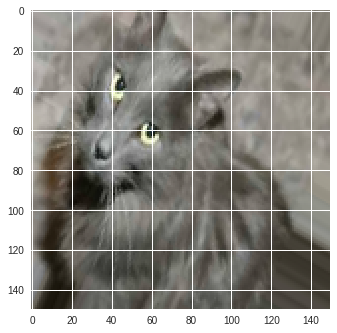

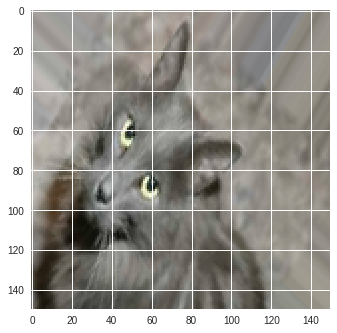

In [0]:
# Displaying some randomly augmented training images
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
# Defining the Neural Network Architecture
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [0]:
# Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 165s 2s/step - loss: 0.6888 - acc: 0.5316 - val_loss: 0.6761 - val_acc: 0.5825
Epoch 2/100
100/100 [==============================] - 36s 358ms/step - loss: 0.6753 - acc: 0.5728 - val_loss: 0.6476 - val_acc: 0.5979
Epoch 3/100
100/100 [==============================] - 35s 348ms/step - loss: 0.6574 - acc: 0.6078 - val_loss: 0.6349 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6365 - acc: 0.6328 - val_loss: 0.6276 - val_acc: 0.6308
Epoch 5/100
100/100 [==============================] - 34s 345ms/step - loss: 0.6206 - acc: 0.6538 - val_loss: 0.6066 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 35s 346ms/step - loss: 0.6130 - acc: 0.6631 - val_loss: 0.6003 - val_acc: 0.6682
Epoch 7/100
100/100 [==============================] - 36s 357ms/step - loss: 0.6003 - acc: 0.6653 - v

In [0]:
# Saving the model

model.save('cats_and_dogs_small_2.h5')

In [0]:
# list of mertics that we saved
model.metrics_names

['loss', 'acc']

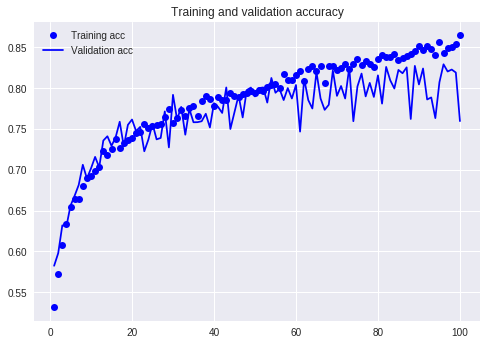

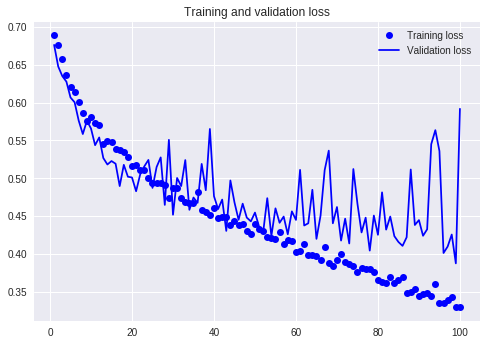

In [0]:
# Plotting the graph
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# make prediction on unseen data now - test data

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
prediction = model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.


In [38]:
# metrics on the test data
prediction

[0.42948567458820824, 0.8293147208121827]

In [0]:
# best results were obtained at epoch 98 and the accuracy was 82%. Lets train a few epochs to get the same results and use that on test

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/1
100/100 [==============================] - 38s 379ms/step - loss: 0.3241 - acc: 0.8528 - val_loss: 0.4269 - val_acc: 0.8147


In [0]:
prediction = model.evaluate_generator(test_generator, steps=100)

In [0]:
prediction

[0.43344118487397115, 0.8292525773195877]